<a href="https://colab.research.google.com/github/HYPEREON008/learning-journey/blob/main/3RfixedOrientationInverseKinematics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import
import math
import matplotlib.pyplot as plt

In [ ]:
#solve
def IK_3R(x,y,phi,L1,L2,L3):
  x2 = x - L3 * math.cos(phi)
  y2 = y - L3 * math.sin(phi)

  if not ((L1-L2)**2<(x2**2 + y2**2)<(L1+L2)**2):
    raise ValueError("Target unreachable")

  cosAlpha = (x2**2 + y2**2 - L1**2 - L2**2) / (2 * L1 * L2)
  #2 possible values of alpha
  sinAlpha = math.sqrt(1 - cosAlpha**2)
  alphaA = math.atan2(sinAlpha,cosAlpha)
  alphaB = math.atan2(-sinAlpha,cosAlpha)

  solutions = []
  for alpha in [alphaA, alphaB]:
    theta = math.atan2(y2, x2) - math.atan2(L2 * math.sin(alpha), L1 + L2 *cosAlpha )
    beta = phi - theta - alpha
    solutions.append((theta, alpha, beta))
  return solutions



In [ ]:
#plot
def plot(L1, L2, L3, theta, alpha, beta, color='b'):
    x0, y0 = 0, 0
    x1 = L1 * math.cos(theta)
    y1 = L1 * math.sin(theta)
    x2 = x1 + L2 * math.cos(theta + alpha)
    y2 = y1 + L2 * math.sin(theta + alpha)
    x3 = x2 + L3 * math.cos(theta + alpha + beta)
    y3 = y2 + L3 * math.sin(theta + alpha + beta)

    plt.plot([x0, x1], [y0, y1], marker='o', color=color, lw=2)
    plt.plot([x1, x2], [y1, y2], marker='o', color=color, lw=2)
    plt.plot([x2, x3], [y2, y3], marker='o', color=color, lw=2)
    plt.plot(x3, y3, marker='o', color='r', lw=2)

IK Solutions:
[(-0.23592530759708097, 2.0153125521813307, -1.2557884689859509), (1.3343247031783196, -2.0153125521813307, 1.2045866246013097)]


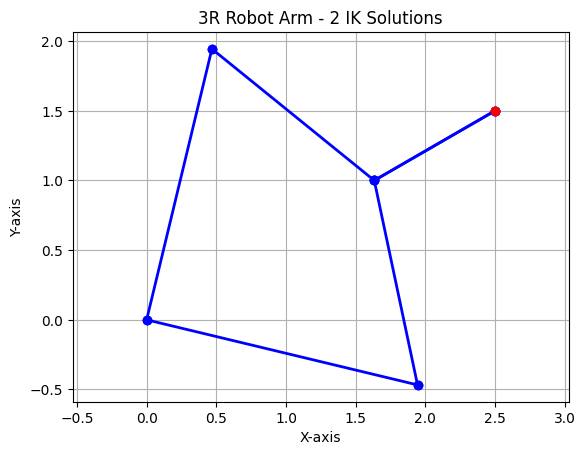

In [ ]:
#test
L1, L2, L3 = 2, 1.5, 1
x, y, phi = 2.5, 1.5, math.radians(30)
solutions = IK_3R(x, y, phi, L1, L2, L3)
print("IK Solutions:")
print(solutions)

for sol in solutions:
    theta, alpha, beta = sol
    plot(L1, L2, L3, theta, alpha, beta)

plt.title("3R Robot Arm - 2 IK Solutions")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.axis('equal') #Makes the x-axis and y-axis use the same scale
plt.show()
